In [32]:
import pandas as pd
import numpy as np
import os 

from tqdm import tqdm
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
import matplotlib.pyplot as plt  # To visualize
import json
from collections import Counter, defaultdict

from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 60)

In [22]:
df = pd.read_csv("../data/colex/colex_clics3_glottolog.csv")

In [27]:
len(df.Glottocode.value_counts()), len(df.ISO639P3code.value_counts())

(1989, 1609)

In [28]:
df = df.dropna(subset="ISO639P3code")

In [30]:
len(df.Glottocode.value_counts()), len(df.ISO639P3code.value_counts())

(1734, 1609)

In [31]:
pron_folder = "../data/phon/preprocessed/"

In [33]:
pron_langs = [x.replace(".tsv", "") for x in os.listdir(pron_folder) if x.endswith(".tsv")]

In [35]:
df= df[df["ISO639P3code"].isin(pron_langs)]

In [45]:
df.rename(columns={"Form":"lemma"}, inplace=True)

In [36]:
len(df.Glottocode.value_counts()), len(df.ISO639P3code.value_counts())

(134, 134)

In [47]:
group_df_ls = []

for lang, group in df.groupby(by="ISO639P3code"):
    print(lang)
    print(f"{pron_folder}{lang}.tsv")
    # print(group)
    df_lang = pd.read_csv(f"{pron_folder}{lang}.tsv", sep="\t")
    group_ = pd.merge(group, df_lang, on="lemma")
    group_df_ls.append(group_)
    del df_lang
    

abk
../data/phon/preprocessed/abk.tsv
ady
../data/phon/preprocessed/ady.tsv
ale
../data/phon/preprocessed/ale.tsv
ang
../data/phon/preprocessed/ang.tsv
asm
../data/phon/preprocessed/asm.tsv
bak
../data/phon/preprocessed/bak.tsv
ban
../data/phon/preprocessed/ban.tsv
bel
../data/phon/preprocessed/bel.tsv
ben
../data/phon/preprocessed/ben.tsv
bod
../data/phon/preprocessed/bod.tsv
bre
../data/phon/preprocessed/bre.tsv
bul
../data/phon/preprocessed/bul.tsv
cat
../data/phon/preprocessed/cat.tsv
cbn
../data/phon/preprocessed/cbn.tsv
ces
../data/phon/preprocessed/ces.tsv
chb
../data/phon/preprocessed/chb.tsv
che
../data/phon/preprocessed/che.tsv
ckb
../data/phon/preprocessed/ckb.tsv
cmn
../data/phon/preprocessed/cmn.tsv
cnk
../data/phon/preprocessed/cnk.tsv
cor
../data/phon/preprocessed/cor.tsv
cym
../data/phon/preprocessed/cym.tsv
dan
../data/phon/preprocessed/dan.tsv
deu
../data/phon/preprocessed/deu.tsv
div
../data/phon/preprocessed/div.tsv
dsb
../data/phon/preprocessed/dsb.tsv
dum
../data/

In [48]:
df_pron = pd.concat(group_df_ls)

In [52]:
df_pron = df_pron.drop_duplicates(subset=["COLEX", "lemma", "ISO639P3code"])

In [53]:
df_pron

,Form_ID_x,Form_ID_y,Concepticon_ID_x,Concepticon_ID_y,Value,lemma,Concept_x,Concept_y,Conc.M.x,Conc.M.y,Conc.SD.x,Conc.SD.y,Glottocode,diff,ISO639P3code,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,ConcDist,COLEX,pron
0,42400-46_earthsoilground-2,42400-7_cultivatedfield-1,1228,212,folde,folde,earth (soil),field,4.80,4.26,0.55,1.02,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.54,earth (soil)~field,f o ɫ d e
2,188-1-222-2,188-7-270-1,618,933,weall,weall,precipice,wall (of house),NaN,NaN,NaN,NaN,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",NaN,precipice~wall (of house),w æ͜ɑ ɫ
4,188-1-410-1,188-1-420-3,420,906,wudu,wudu,forest,tree,4.76,5.00,0.64,0.00,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.24,forest~tree,w u d u
5,188-1-430-1,188-1-410-1,420,1803,wudu,wudu,forest,wood,4.76,4.85,0.64,0.46,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.09,forest~wood,w u d u
6,42400-52_wood-2,42400-48_tree-3,906,1803,"wudu, widu, wiodu",wudu,tree,wood,5.00,4.85,0.00,0.46,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.15,tree~wood,w u d u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Vietnamese-194_therabbit-1,Vietnamese-1387_thehare-1,1136,1190,thỏ,thỏ,rabbit,hare,4.93,4.88,0.26,0.34,viet1252,True,vie,Vietnamese,Austroasiatic,Eurasia,20.681188,105.774071,"AES(ordinal=1, id='safe', name='not endangered...",0.05,rabbit~hare,tʰ ɔ ˨˩˦
384,Vietnamese-1434_thegrandchild-1,Vietnamese-1435_thesiblingschild-1,1617,173,cháu,cháu,grandchild,sibling's child,4.26,NaN,1.23,NaN,viet1252,True,vie,Vietnamese,Austroasiatic,Eurasia,20.681188,105.774071,"AES(ordinal=1, id='safe', name='not endangered...",NaN,grandchild~sibling's child,c aː w ˦˥
0,267-10-490-1,267-10-470-1,695,1752,iya,iya,go,leave,3.15,2.53,1.38,1.33,waur1244,True,wau,Waurá,Arawakan,South America,-13.296000,-53.697100,"AES(ordinal=3, id='definite', name='shifting',...",0.62,go~leave,i j a
1,267-11-130-1,267-11-620-1,1749,1823,iya,iya,take,borrow,3.06,3.10,1.44,1.23,waur1244,True,wau,Waurá,Arawakan,South America,-13.296000,-53.697100,"AES(ordinal=3, id='definite', name='shifting',...",0.04,take~borrow,i j a


In [54]:
len(df.Glottocode.value_counts()), len(df.ISO639P3code.value_counts())

(134, 134)

In [56]:
import panphon
ft = panphon.FeatureTable()

In [57]:
features = ["syl", "son", "cons", "cont", "delrel", "lat", "nas", "strid", "voi", "sg", "cg", "ant", 
            "cor", "distr", "lab", "hi", "lo", "back", "round", "velaric", "tense", "long", "hitone", "hireg"]
Initial_features = [f"init_{x}" for x in features]
all_features = Initial_features+features

In [58]:
def get_phon_features(phone):
    r = ft.word_to_vector_list(phone, numeric=True)
    r_arr = np.array(r)
    seg_len = r_arr.shape[0]
    
    r_initials = r[0]
    r_values = np.count_nonzero(r_arr==1, axis=0)/seg_len
    
    rs = np.concatenate((r_initials, r_values), axis=0)
    return pd.Series(rs)

In [ ]:
df_pron[all_features]= df_pron["pron"].parallel_apply(get_phon_features)

In [67]:
df_pron["Conc"]=df_pron["Conc.M.x"]-df_pron["Conc.M.y"]

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_25189/2209594377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pron["Conc"]=df_pron["Conc.M.x"]-df_pron["Conc.M.y"]


In [88]:
df_pron["Conc"] = df_pron["Conc"].abs()

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_25189/3037294584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pron["Conc"] = df_pron["Conc"].abs()


In [70]:
df_pron=df_pron.dropna(subset="Conc")

In [63]:
import scipy.stats

In [89]:
df_pron

,Form_ID_x,Form_ID_y,Concepticon_ID_x,Concepticon_ID_y,Value,lemma,Concept_x,Concept_y,Conc.M.x,Conc.M.y,Conc.SD.x,Conc.SD.y,Glottocode,diff,ISO639P3code,Name,Top-level family,Macroarea,Latitude,Longitude,Endangerment,ConcDist,COLEX,pron,init_syl,init_son,init_cons,init_cont,init_delrel,init_lat,...,init_velaric,init_tense,init_long,init_hitone,init_hireg,syl,son,cons,cont,delrel,lat,nas,strid,voi,sg,cg,ant,cor,distr,lab,hi,lo,back,round,velaric,tense,long,hitone,hireg,Conc
0,42400-46_earthsoilground-2,42400-7_cultivatedfield-1,1228,212,folde,folde,earth (soil),field,4.80,4.26,0.55,1.02,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.54,earth (soil)~field,f o ɫ d e,-1.0,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,0.0,-1.0,0.0,0.0,0.400000,0.600000,0.600000,0.800000,0.0,0.2,0.000000,0.2,0.800000,0.0,0.000000,0.600000,0.400000,0.0,0.200000,0.000000,0.000000,0.400000,0.200000,0.0,0.400000,0.000000,0.000000,0.000000,0.54
4,188-1-410-1,188-1-420-3,420,906,wudu,wudu,forest,tree,4.76,5.00,0.64,0.00,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.24,forest~tree,w u d u,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,0.0,-1.0,0.0,0.0,0.500000,0.750000,0.250000,0.750000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.250000,0.250000,0.0,0.750000,0.750000,0.000000,0.750000,0.750000,0.0,0.500000,0.000000,0.000000,0.000000,0.24
5,188-1-430-1,188-1-410-1,420,1803,wudu,wudu,forest,wood,4.76,4.85,0.64,0.46,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.09,forest~wood,w u d u,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,0.0,-1.0,0.0,0.0,0.500000,0.750000,0.250000,0.750000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.250000,0.250000,0.0,0.750000,0.750000,0.000000,0.750000,0.750000,0.0,0.500000,0.000000,0.000000,0.000000,0.09
6,42400-52_wood-2,42400-48_tree-3,906,1803,"wudu, widu, wiodu",wudu,tree,wood,5.00,4.85,0.00,0.46,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.15,tree~wood,w u d u,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,0.0,-1.0,0.0,0.0,0.500000,0.750000,0.250000,0.750000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.250000,0.250000,0.0,0.750000,0.750000,0.000000,0.750000,0.750000,0.0,0.500000,0.000000,0.000000,0.000000,0.15
8,188-1-851-1,188-1-852-1,141,1428,bærnan,bærnan,burn (something),burning,4.11,3.85,1.25,1.32,olde1238,True,ang,Old English (ca. 450-1100),Indo-European,Eurasia,51.060000,-1.310000,"AES(ordinal=6, id='extinct', name='extinct', e...",0.26,burn (something)~burning,b æ rˠ n ɑ n,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,-1.0,0.0,0.0,0.333333,0.833333,0.666667,0.500000,0.0,0.0,0.333333,0.0,1.000000,0.0,0.000000,0.666667,0.500000,0.0,0.166667,0.166667,0.333333,0.333333,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Vietnamese-415_theplate-1,Vietnamese-414_thedish-1,480,481,đĩa,đĩa,plate,dish,4.77,4.90,0.68,0.40,viet1252,True,vie,Vietnamese,Austroasiatic,Eurasia,20.681188,105.774071,"AES(ordinal=1, id='safe', name='not endangered...",0.13,plate~dish,ʔ ɗ i ə ˨˩˦,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,-1.0,0.0,0.0,0.285714,0.428571,0.142857,0.285714,0.0,0.0,0.000000,0.0,0.428571,0.0,0.285714,0.142857,0.142857,0.0,0.000000,0.142857,0.000000,0.142857,0.000000,0.0,0.142857,0.000000,0.142857,0.142857,0.13
378,Vietnamese-194_therabbit-1,Vietnamese-1387_thehare-1,1136,1190,thỏ,thỏ,rabbit,hare,4.93,4.88,0.26,0.34,viet1252,True,vie,Vietnamese,Austroasiatic,Eurasia,20.681188,105.774071,"AES(ordinal=1, id='safe', name='not endangered...",0.05,rabbit

In [103]:
X_df_pron = pd.DataFrame.from_dict(df_pron.groupby("Conc").agg("count")["lemma"].to_dict(), orient="index")
X_df_pron["Conc"] = X_df_pron.index

<Axes: xlabel='Conc', ylabel='Count'>

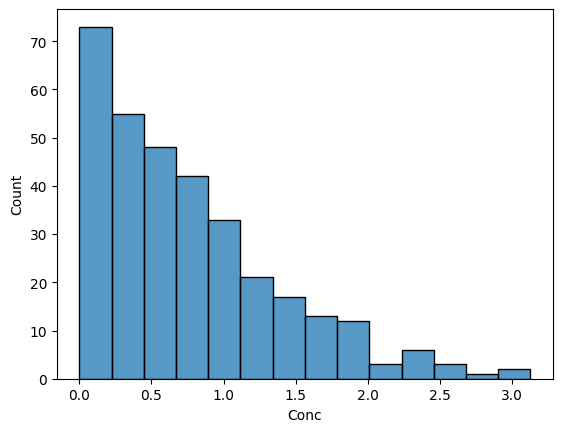

In [105]:
sns.histplot(data=X_df_pron, x="Conc")

In [109]:
def pearsonr(df, feature):
    df_feature= df[["Conc", feature]]
    sns.lmplot(data=df, x="Conc", y=feature)
    X = df_feature["Conc"].values
    print(X.shape)
    Y = df_feature[feature].values
    print(Y.shape)
    pr = scipy.stats.pearsonr(X,Y)
    return pr.statistic, pr.pvalue
    

(1723,)
(1723,)


(-0.03724275118957255, 0.12226770478113905)

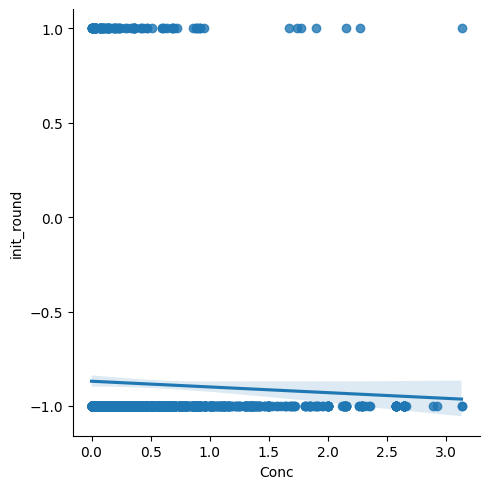

In [113]:
pearsonr(df_pron, "init_round")

(329,)
(329,)


(-0.2649772635311118,
 1.0859807715220508e-06,
           #init_voi      Conc
 0.000000        109  0.000000
 0.006667          2  0.006667
 0.010000         22  0.010000
 0.010000          1  0.010000
 0.020000          9  0.020000
 ...             ...       ...
 2.640000         18  2.640000
 2.660000          1  2.660000
 2.890000          1  2.890000
 2.920000          1  2.920000
 3.130000          3  3.130000
 
 [329 rows x 2 columns])

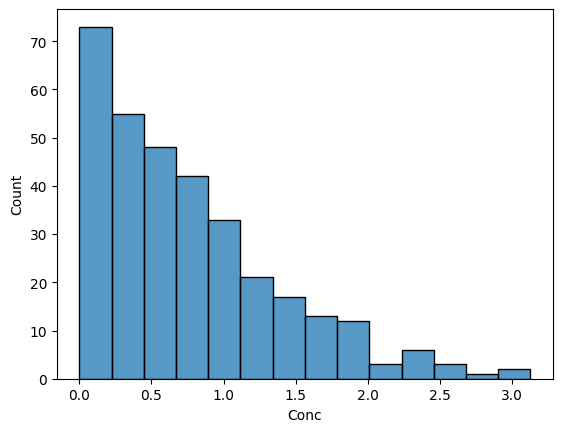

In [96]:
pearsonr(df_pron, "init_voi")

(329,)
(329,)


(-0.2649772635311118,
 1.0859807715220508e-06,
           #round      Conc
 0.000000     109  0.000000
 0.006667       2  0.006667
 0.010000      22  0.010000
 0.010000       1  0.010000
 0.020000       9  0.020000
 ...          ...       ...
 2.640000      18  2.640000
 2.660000       1  2.660000
 2.890000       1  2.890000
 2.920000       1  2.920000
 3.130000       3  3.130000
 
 [329 rows x 2 columns])

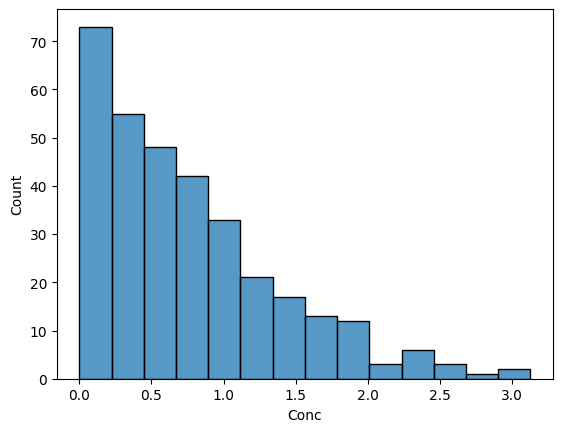

In [107]:
pearsonr(df_pron, "round")

(329,)
(329,)


(-0.2649772635311118,
 1.0859807715220508e-06,
           #init_round      Conc
 0.000000          109  0.000000
 0.006667            2  0.006667
 0.010000           22  0.010000
 0.010000            1  0.010000
 0.020000            9  0.020000
 ...               ...       ...
 2.640000           18  2.640000
 2.660000            1  2.660000
 2.890000            1  2.890000
 2.920000            1  2.920000
 3.130000            3  3.130000
 
 [329 rows x 2 columns])

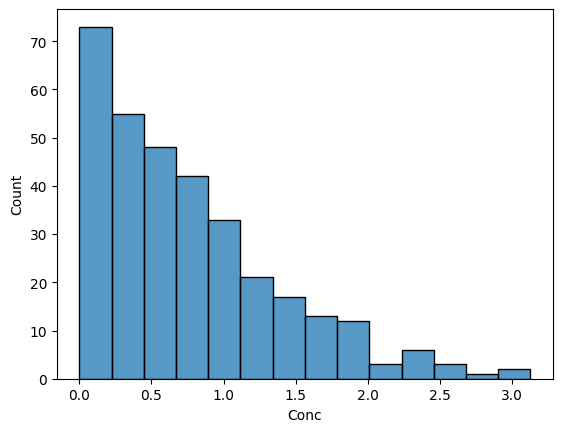

In [95]:
pearsonr(df_pron, "init_round")